In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug,clinical_data, on='Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_tumor = combined_data.groupby(['Drug','Timepoint'])

new_tumor = group_tumor['Tumor Volume (mm3)'].mean()

# Convert to DataFrame

group_tum = pd.DataFrame(new_tumor)

# Preview DataFrame
group_tum.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_error_tumor = group_tumor['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stand_error_tum = pd.DataFrame(stand_error_tumor)
# Preview DataFrame
stand_error_tum.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
group_tum_clean = group_tum.pivot_table(index='Timepoint' , columns = 'Drug', values='Tumor Volume (mm3)')
stand_error_clean = stand_error_tum.pivot_table(index='Timepoint' , columns = 'Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
group_tum_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
stand_error_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


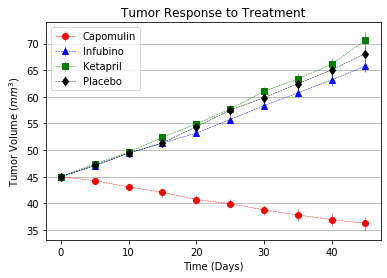

In [7]:
# Generate the Plot (with Error Bars)
x_axis = group_tum_clean.index
y_axis1 = group_tum_clean['Capomulin']
y_axis_error1 = stand_error_clean['Capomulin']
y_axis2 = group_tum_clean['Infubinol']
y_axis_error2 = stand_error_clean['Infubinol']
y_axis3 = group_tum_clean['Ketapril']
y_axis_error3 = stand_error_clean['Ketapril']
y_axis4 = group_tum_clean['Placebo']
y_axis_error4 = stand_error_clean['Placebo']
plt.errorbar(x_axis, y_axis1, y_axis_error1, label = 'Capomulin', color = 'red', fmt='o', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis2, y_axis_error2, label = 'Infubino', color = 'blue', fmt='^', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis3, y_axis_error3, label = 'Ketapril', color = 'green', fmt='s', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis4, y_axis_error4, label = 'Placebo', color = 'black', fmt='d', linestyle ='--', linewidth=0.5 )
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume '+ "$(mm^3)$")
# Save the Figure
plt.savefig("Tumor Response to Treatment.png")



In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_MetaSite = combined_data.groupby(['Drug','Timepoint'])
Mean_Met_Site = group_MetaSite['Metastatic Sites'].mean()
# Convert to DataFrame
group_mean_Met = pd.DataFrame(Mean_Met_Site)
# Preview DataFrame
group_mean_Met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stand_error_Met = group_MetaSite['Metastatic Sites'].sem()
# Convert to DataFrame
stand_error_Site = pd.DataFrame(stand_error_Met)
# Preview DataFrame
stand_error_Site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
group_mean_Met_clean = group_mean_Met.pivot_table(index='Timepoint' , columns = 'Drug', values='Metastatic Sites')
stand_error_Site_clean = stand_error_Site.pivot_table(index='Timepoint' , columns = 'Drug', values='Metastatic Sites')
# Preview that Reformatting worked
stand_error_Site_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [12]:
group_mean_Met_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


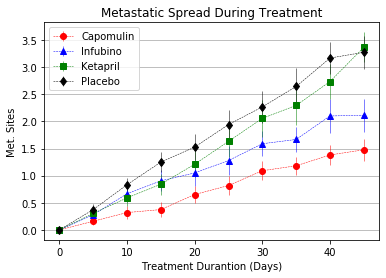

In [13]:
# Generate the Plot (with Error Bars)
x_axis = group_mean_Met_clean.index
y_axis1 = group_mean_Met_clean['Capomulin']
y_axis_error1 = stand_error_Site_clean['Capomulin']
y_axis2 = group_mean_Met_clean['Infubinol']
y_axis_error2 = stand_error_Site_clean['Infubinol']
y_axis3 = group_mean_Met_clean['Ketapril']
y_axis_error3 = stand_error_Site_clean['Ketapril']
y_axis4 = group_mean_Met_clean['Placebo']
y_axis_error4 = stand_error_Site_clean['Placebo']
plt.errorbar(x_axis, y_axis1, y_axis_error1, label = 'Capomulin', color = 'red', fmt='o', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis2, y_axis_error2, label = 'Infubino', color = 'blue', fmt='^', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis3, y_axis_error3, label = 'Ketapril', color = 'green', fmt='s', linestyle ='--', linewidth=0.5 )
plt.errorbar(x_axis, y_axis4, y_axis_error4, label = 'Placebo', color = 'black', fmt='d', linestyle ='--', linewidth=0.5 )
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Durantion (Days)')
plt.ylabel('Met. Sites')
# Save the Figure
plt.savefig("Metastatic Spread During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
group_mice = group_MetaSite['Mouse ID'].count()
# Convert to DataFrame
group_mice_count = pd.DataFrame(group_mice)
# Preview DataFrame
group_mice_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
group_mice_count_clean = group_mice_count.pivot_table(index='Timepoint' , columns = 'Drug', values='Mouse ID')
# Preview the Data Frame
group_mice_count_clean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


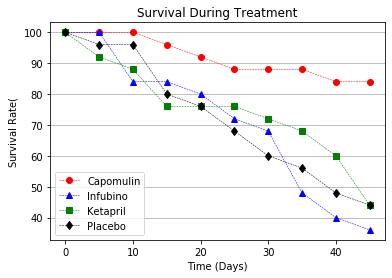

In [46]:
# Generate the Plot (Accounting for percentages)
mice_duplicate = group_mice_count_clean
cols=list(mice_duplicate.columns)
for i in range(len(cols)):
    mice_duplicate[cols[i]] = (mice_duplicate[cols[i]]  / mice_duplicate.iloc[0,i])*100
x_axis = mice_duplicate.index
y_axis1 = mice_duplicate['Capomulin']
y_axis2 = mice_duplicate['Infubinol']
y_axis3 = mice_duplicate['Ketapril']
y_axis4 = mice_duplicate['Placebo']
plt.plot(x_axis, y_axis1,  label = 'Capomulin', color = 'red', marker='o', linestyle ='--', linewidth=0.5 )
plt.plot(x_axis, y_axis2,  label = 'Infubino', color = 'blue', marker='^', linestyle ='--', linewidth=0.5 )
plt.plot(x_axis, y_axis3,  label = 'Ketapril', color = 'green', marker='s', linestyle ='--', linewidth=0.5 )
plt.plot(x_axis, y_axis4,  label = 'Placebo', color = 'black', marker='d', linestyle ='--', linewidth=0.5 )
plt.grid(axis='y')
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate'+ "$(%)$")
# Save the Figure
plt.savefig("Survival During Treatment.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [29]:
# Calculate the percent changes for each drug
percent_change = (group_tum_clean.iloc[-1]/group_tum_clean.iloc[0]-1)*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

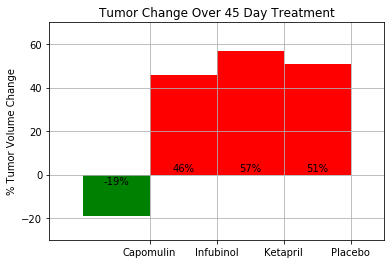

In [47]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = tuple([i for i in percent_change.values])

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
tick_marks = ['Capomulin','Infubinol','Ketapril','Placebo']
x_axis = [1,2,3,4]
y_axis = [int(percent_change[x]) for x in tick_marks]
colors = ['r' if x >0 else 'g' for x in y_axis]
plt.bar(x_axis,y_axis,color=colors, width=-1 ,align='edge')
plt.grid()
plt.title('Tumor Change Over 45 Day Treatment')
plt.xticks(x_axis,tick_marks)
plt.ylabel('% Tumor Volume Change')
plt.xlim(-0.5,4.5)
plt.ylim(-30,70)
text_x= [x-0.5 for x in x_axis]
text_y= [0.5 if x >0 else (-5.5) for x in y_axis]
text = [f'{x}%' for x in y_axis]
for i in range(len(text)):
    plt.text(text_x[i],text_y[i],text[i],horizontalalignment="center", verticalalignment="bottom")
# Save the Figure
plt.savefig("Tumor Change Over 45 Day Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)